## Test numpy & matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

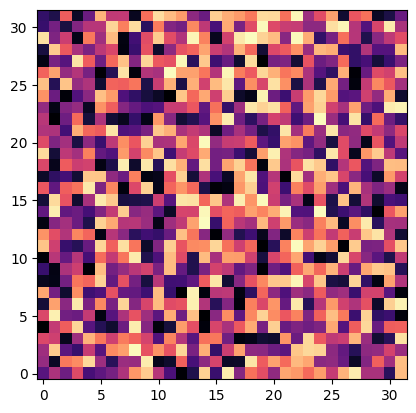

In [2]:
plt.imshow( np.random.rand( 32, 32 ), origin='lower', cmap=plt.get_cmap('magma') );

## Test MPI

In [3]:
import numpy as np
import ipcmagic
import ipyparallel as ipp

In [4]:
c = ipp.Client()

Waiting for connection file: ~/.ipython/profile_default/security/ipcontroller-client.json


OSError: Connection file '~/.ipython/profile_default/security/ipcontroller-client.json' not found.
You have attempted to connect to an IPython Cluster but no Controller could be found.
Please double-check your configuration and ensure that a cluster is running.

In [ ]:
c.ids

In [ ]:
%%px
import socket
from mpi4py import MPI

In [ ]:
%%px
print("Hello World from rank %s of %s on nid %s" % (MPI.COMM_WORLD.rank,
                                                    MPI.COMM_WORLD.size,
                                                    socket.gethostname()))

In [ ]:
c.close()
%ipcluster stop

## Test Cupy

In [5]:
import numpy as np
import cupy as cp
import time

In [6]:
### Numpy and CPU
s = time.time()
x_cpu = np.ones((1000,1000,1000))
e = time.time()
print(e - s)

### CuPy and GPU
s = time.time()
x_gpu = cp.ones((1000,1000,1000))
cp.cuda.Stream.null.synchronize()
e = time.time()
print(e - s)

0.32851099967956543
3.1985650062561035


## Test GT4Py

In [7]:
import os
import warnings
import gt4py.next as gtx
from gt4py.next import Field

nx = 4
ny = 4
nz = 4
dtype = np.float64

backend = gtx.itir_python
# backend = gtx.gtfn_cpu
# backend = gtx.gtfn_gpu

I = gtx.Dimension("I")
J = gtx.Dimension("J")
K = gtx.Dimension("K", kind=gtx.DimensionKind.VERTICAL)

domain = gtx.domain({I: nx, J: ny, K: nz})

in_field = gtx.as_field(
    domain,
    np.fromfunction(lambda x, y, z: x**2 + y**2, shape=(nx, ny, nz)),
    dtype,
    allocator=backend,
)
out_field = gtx.zeros(domain, dtype, allocator=backend)

In [8]:
Ioff = gtx.FieldOffset("I", source=I, target=(I,))
Joff = gtx.FieldOffset("J", source=J, target=(J,))

@gtx.field_operator
def copy_operator(inp: Field[[I, J, K], dtype]) -> Field[[I, J, K], dtype]:
    return inp

@gtx.program(backend=backend)
def copy_program(inp: Field[[I, J, K], dtype], out: Field[[I, J, K], dtype]):
    copy_operator(inp, out=out)

copy_program(in_field, out_field, offset_provider={"Ioff": I, "Joff": J})

print(out_field.asnumpy)

<bound method NdArrayField.asnumpy of NumPyArrayField(_domain=Domain(dims=(Dimension(value='I', kind=<DimensionKind.HORIZONTAL: 'horizontal'>), Dimension(value='J', kind=<DimensionKind.HORIZONTAL: 'horizontal'>), Dimension(value='K', kind=<DimensionKind.VERTICAL: 'vertical'>)), ranges=(UnitRange(0, 4), UnitRange(0, 4), UnitRange(0, 4))), _ndarray=array([[[ 0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.],
        [ 4.,  4.,  4.,  4.],
        [ 9.,  9.,  9.,  9.]],

       [[ 1.,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  2.],
        [ 5.,  5.,  5.,  5.],
        [10., 10., 10., 10.]],

       [[ 4.,  4.,  4.,  4.],
        [ 5.,  5.,  5.,  5.],
        [ 8.,  8.,  8.,  8.],
        [13., 13., 13., 13.]],

       [[ 9.,  9.,  9.,  9.],
        [10., 10., 10., 10.],
        [13., 13., 13., 13.],
        [18., 18., 18., 18.]]]))>


## Check installed packages

In [9]:
%%bash
python -m pip list

/user-environment/env/default/bin/python: No module named pip


CalledProcessError: Command 'b'python -m pip list\n'' returned non-zero exit status 1.